# Generate Auxtel transmission from SDSS prime filters (no telescope transmission)

- author Sylvie Dagoret-Campagne
- creation date : 2024/03/29
- last verification : 2024/03/30

https://confluence.lsstcorp.org/pages/viewpage.action?spaceKey=LTS&title=AuxTel+Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import copy

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
props = dict(boxstyle='round', facecolor='yellow', alpha=0.3)

In [2]:
from scipy import interpolate
from astropy import constants as const
from astropy import units as u

## Define the imput file

In [3]:
df = pd.read_excel("LSST_SDSS_Filters_primes.xlsx")

https://github.com/lsst/rubin_sim_notebooks/blob/main/photometry/calculating_snr.ipynb

In [4]:
df

,BG WL,u' BG,g' BG,r' BG,I' BG,z' BG,y' BG,u' WL,u' 1,u' 2,...,g' WL,g',r' WL,r',i' WL,I',z' WL,z',y' WL,y'
0,3000,0.00065,-0.00010,-0.00005,-0.00005,-0.00010,-0.00005,3000.0,0.00075,0.00075,...,3800.0,-0.00005,5400.0,0.00005,6500.0,-0.00005,7800.0,0.0,9200.0,0.00050
1,3010,0.00030,-0.00005,-0.00005,-0.00005,-0.00005,-0.00005,3010.0,0.00065,0.00060,...,3810.0,0.00000,5410.0,0.00000,6510.0,-0.00005,7810.0,0.0,9210.0,0.00030
2,3020,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,-0.00005,3020.0,0.00020,0.00020,...,3820.0,-0.00005,5420.0,0.00005,6520.0,-0.00005,7820.0,0.0,9220.0,0.00070
3,3030,0.00000,-0.00010,-0.00005,-0.00005,-0.00010,-0.00005,3030.0,0.00000,0.00000,...,3830.0,0.00000,5430.0,0.00005,6530.0,0.00000,7830.0,0.0,9230.0,0.00045
4,3040,-0.00005,-0.00005,-0.00005,-0.00005,-0.00005,-0.00005,3040.0,0.00000,-0.00005,...,3840.0,0.00000,5440.0,0.00005,6540.0,-0.00005,7840.0,0.0,9240.0,0.00055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,12460,0.00020,0.51755,0.57150,0.23960,0.15615,0.00050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,12470,0.00035,0.51165,0.65090,0.27940,0.16050,0.00045,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,12480,0.00035,0.50500,0.72935,0.32505,0.16520,0.00075,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,12490,0.00000,0.49850,0.79275,0.37175,0.16970,0.00110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['BG WL', 'u' BG', 'g' BG', 'r' BG', 'I' BG', 'z' BG', 'y' BG', 'u' WL',
       'u' 1', 'u' 2', 'No Filter', 'g' WL', 'g'', 'r' WL', 'r'', 'i' WL',
       'I'', 'z' WL', 'z'', 'y' WL', 'y''],
      dtype='object')

## No Nan but must cut

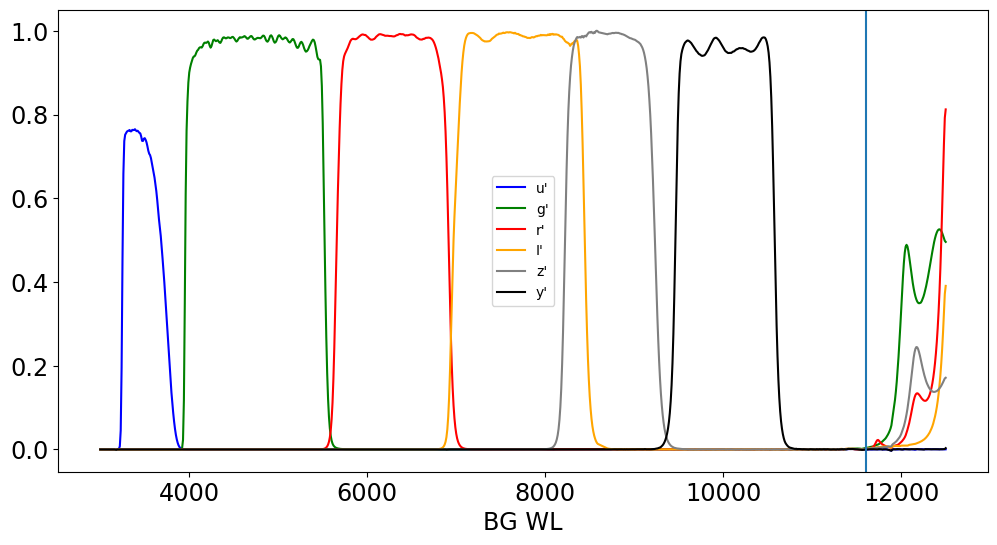

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df.plot(x='BG WL', y='u\' BG',ax=ax,color='b',label="u\'")
df.plot(x='BG WL', y='g\' BG',ax=ax,color='g',label="g\'")
df.plot(x='BG WL', y='r\' BG',ax=ax,color='r',label="r\'")
df.plot(x='BG WL', y='I\' BG',ax=ax,color='orange',label="I\'")
df.plot(x='BG WL', y='z\' BG',ax=ax,color='grey',label="z\'")
df.plot(x='BG WL', y='y\' BG',ax=ax,color='k',label="y\'")
ax.legend()
ax.axvline(11600)

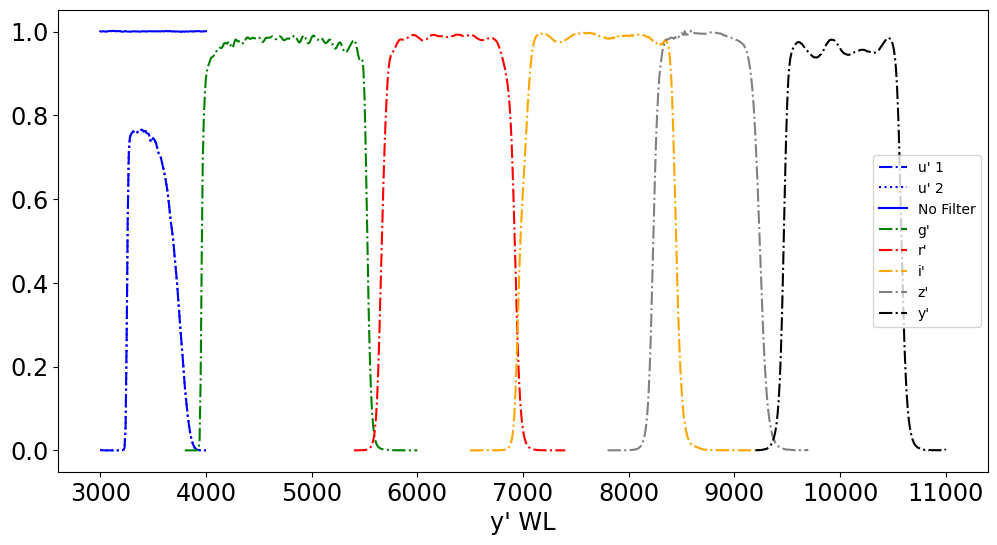

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df.plot(x='u\' WL', y='u\' 1',ax=ax,ls="-.",color='b',label="u\' 1")
df.plot(x='u\' WL', y='u\' 2',ax=ax,ls=":",color='b',label="u\' 2")
df.plot(x='u\' WL', y='No Filter',ax=ax,ls="-",color='b',label="No Filter")
df.plot(x='g\' WL', y='g\'',ax=ax,ls="-.",color='g',label="g\'")

df.plot(x='r\' WL', y='r\'',ax=ax,ls="-.",color='r',label="r\'")
df.plot(x='i\' WL', y='I\'',ax=ax,ls="-.",color='orange',label="i\'")
df.plot(x='z\' WL', y='z\'',ax=ax,ls="-.",color='grey',label="z\'")
df.plot(x='y\' WL', y='y\'',ax=ax,ls="-.",color='k',label="y\'")
ax.legend()

## Write filters for auxtel_SDSS

In [8]:
#auxtel_sdss_up.dat
# Wavelength(nm)  Throughput(0-1)

### U filter

In [9]:
filename_filter = 'auxtel_sdss_up.dat'

In [10]:
df_u =df[['BG WL','u\' BG']].rename(columns={'BG WL':'Wavelength(A)','u\' BG':'Throughput(0-1)'})

In [11]:
df_u

,Wavelength(A),Throughput(0-1)
0,3000,0.00065
1,3010,0.00030
2,3020,0.00005
3,3030,0.00000
4,3040,-0.00005
...,...,...
937,12460,0.00020
938,12470,0.00035
939,12480,0.00035
940,12490,0.00000


In [12]:
df_u =df[['BG WL','u\' BG']].rename(columns={'BG WL':'Wavelength(A)','u\' BG':'Throughput(0-1)'})

In [13]:
df_u['Wavelength(nm)'] = df_u['Wavelength(A)']/10.
df_u.drop('Wavelength(A)',axis=1,inplace=True)
df_u = df_u[['Wavelength(nm)','Throughput(0-1)']]

In [14]:
df_u

,Wavelength(nm),Throughput(0-1)
0,300.0,0.00065
1,301.0,0.00030
2,302.0,0.00005
3,303.0,0.00000
4,304.0,-0.00005
...,...,...
937,1246.0,0.00020
938,1247.0,0.00035
939,1248.0,0.00035
940,1249.0,0.00000


In [15]:
cut_wl = (df_u['Wavelength(nm)']>200) & (df_u['Wavelength(nm)']<1160)

In [16]:
df_u =df_u[cut_wl]

In [17]:
df_u['Throughput(0-1)'][df_u['Throughput(0-1)']<0] = 0

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_16202/1174684242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u['Throughput(0-1)'][df_u['Throughput(0-1)']<0] = 0


In [18]:
df_u

,Wavelength(nm),Throughput(0-1)
0,300.0,0.00065
1,301.0,0.00030
2,302.0,0.00005
3,303.0,0.00000
4,304.0,0.00000
...,...,...
846,1155.0,0.00000
847,1156.0,0.00000
848,1157.0,0.00000
849,1158.0,0.00000


<Axes: xlabel='Wavelength(nm)'>

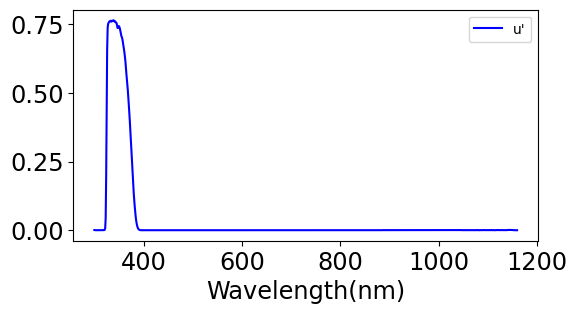

In [19]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_u.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='b',label="u\'")

In [20]:
df_u.set_index('Wavelength(nm)')

,Throughput(0-1)
Wavelength(nm),
300.0,0.00065
301.0,0.00030
302.0,0.00005
303.0,0.00000
304.0,0.00000
...,...
1155.0,0.00000
1156.0,0.00000
1157.0,0.00000


In [21]:
#df_u.index.rename('Wavelength(nm)',inplace=True)

In [22]:
df_u

,Wavelength(nm),Throughput(0-1)
0,300.0,0.00065
1,301.0,0.00030
2,302.0,0.00005
3,303.0,0.00000
4,304.0,0.00000
...,...,...
846,1155.0,0.00000
847,1156.0,0.00000
848,1157.0,0.00000
849,1158.0,0.00000


In [23]:
df_u.to_csv(filename_filter,sep=' ',index=False)

## g filter

In [24]:
filename_filter = 'auxtel_sdss_gp.dat'

In [25]:
df_g =df[['BG WL','g\' BG']].rename(columns={'BG WL':'Wavelength(A)','g\' BG':'Throughput(0-1)'})

In [26]:
df_g

,Wavelength(A),Throughput(0-1)
0,3000,-0.00010
1,3010,-0.00005
2,3020,-0.00005
3,3030,-0.00010
4,3040,-0.00005
...,...,...
937,12460,0.51755
938,12470,0.51165
939,12480,0.50500
940,12490,0.49850


In [27]:
df_g['Wavelength(nm)'] = df_g['Wavelength(A)']/10.
df_g.drop('Wavelength(A)',axis=1,inplace=True)
df_g = df_g[['Wavelength(nm)','Throughput(0-1)']]

In [28]:
cut_wl = (df_g['Wavelength(nm)']>200.) & (df_g['Wavelength(nm)']<1160.)

In [29]:
df_g = df_g[cut_wl]

In [30]:
df_g

,Wavelength(nm),Throughput(0-1)
0,300.0,-0.00010
1,301.0,-0.00005
2,302.0,-0.00005
3,303.0,-0.00010
4,304.0,-0.00005
...,...,...
846,1155.0,0.00125
847,1156.0,0.00145
848,1157.0,0.00200
849,1158.0,0.00245


In [31]:
df_g['Throughput(0-1)'][df_g['Throughput(0-1)']<0] = 0

<Axes: xlabel='Wavelength(nm)'>

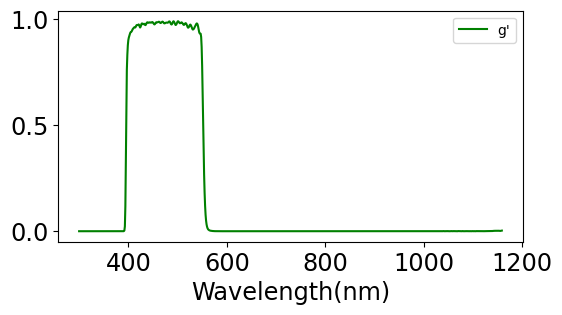

In [32]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_g.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='g',label="g\'")

In [33]:
df_g.set_index('Wavelength(nm)')

,Throughput(0-1)
Wavelength(nm),
300.0,0.00000
301.0,0.00000
302.0,0.00000
303.0,0.00000
304.0,0.00000
...,...
1155.0,0.00125
1156.0,0.00145
1157.0,0.00200


In [34]:
df_g.to_csv(filename_filter,sep=' ',index=False)

### r filter

In [35]:
filename_filter = 'auxtel_sdss_rp.dat'

In [36]:
df_r =df[['BG WL','r\' BG']].rename(columns={'BG WL':'Wavelength(A)','r\' BG':'Throughput(0-1)'})

In [37]:
df_r

,Wavelength(A),Throughput(0-1)
0,3000,-0.00005
1,3010,-0.00005
2,3020,-0.00005
3,3030,-0.00005
4,3040,-0.00005
...,...,...
937,12460,0.57150
938,12470,0.65090
939,12480,0.72935
940,12490,0.79275


In [38]:
df_r['Wavelength(nm)'] = df_r['Wavelength(A)']/10.
df_r.drop('Wavelength(A)',axis=1,inplace=True)
df_r = df_r[['Wavelength(nm)','Throughput(0-1)']]

In [39]:
df_r['Throughput(0-1)'][df_r['Throughput(0-1)']<0] = 0

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_16202/3240302734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['Throughput(0-1)'][df_r['Throughput(0-1)']<0] = 0


In [40]:
cut_wl = (df_r['Wavelength(nm)']>200.) & (df_r['Wavelength(nm)']<1160)

In [41]:
df_r = df_r[cut_wl]

<Axes: xlabel='Wavelength(nm)'>

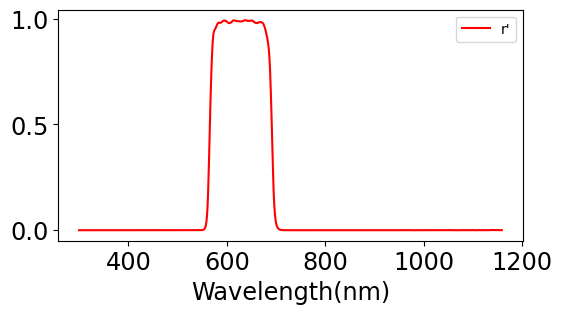

In [42]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_r.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='r',label="r\'")

In [43]:
df_r.set_index('Wavelength(nm)')

,Throughput(0-1)
Wavelength(nm),
300.0,0.0000
301.0,0.0000
302.0,0.0000
303.0,0.0000
304.0,0.0000
...,...
1155.0,0.0000
1156.0,0.0000
1157.0,0.0000


In [44]:
df_r.to_csv(filename_filter,sep=' ',index=False)

### I Filter

In [45]:
filename_filter = 'auxtel_sdss_ip.dat'

In [46]:
df_i =df[['BG WL','I\' BG']].rename(columns={'BG WL':'Wavelength(A)','I\' BG':'Throughput(0-1)'})

In [47]:
df_i['Wavelength(nm)'] = df_i['Wavelength(A)']/10.
df_i.drop('Wavelength(A)',axis=1,inplace=True)
df_i = df_i[['Wavelength(nm)','Throughput(0-1)']]

In [48]:
df_i['Throughput(0-1)'][df_i['Throughput(0-1)']<0] = 0

In [49]:
cut_wl = (df_i['Wavelength(nm)']>200.) & (df_i['Wavelength(nm)']<1160)

In [50]:
df_i = df_i[cut_wl]

<Axes: xlabel='Wavelength(nm)'>

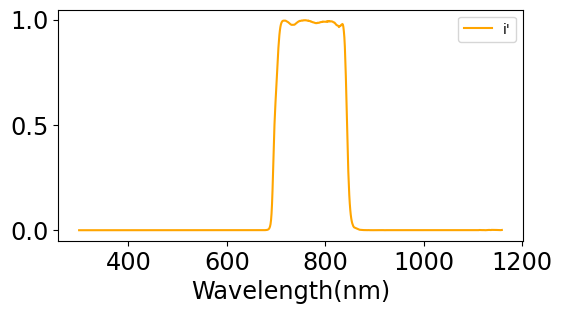

In [51]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_i.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='orange',label="i\'")

In [52]:
df_i.set_index('Wavelength(nm)')

,Throughput(0-1)
Wavelength(nm),
300.0,0.00000
301.0,0.00000
302.0,0.00000
303.0,0.00000
304.0,0.00000
...,...
1155.0,0.00000
1156.0,0.00020
1157.0,0.00045


In [53]:
df_i.to_csv(filename_filter,sep=' ',index=False)

### z filter

In [54]:
filename_filter = 'auxtel_sdss_zp.dat'

In [55]:
df_z =df[['BG WL','z\' BG']].rename(columns={'BG WL':'Wavelength(A)','z\' BG':'Throughput(0-1)'})

In [56]:
df_z['Wavelength(nm)'] = df_z['Wavelength(A)']/10.
df_z.drop('Wavelength(A)',axis=1,inplace=True)
df_z = df_z[['Wavelength(nm)','Throughput(0-1)']]

In [57]:
df_z['Throughput(0-1)'][df_z['Throughput(0-1)']<0] = 0

In [58]:
cut_wl = (df_z['Wavelength(nm)']>200.) & (df_z['Wavelength(nm)']<1160)
cut_wl1 = df_z['Wavelength(nm)']>200. 
cut_wl2 = df_z['Wavelength(nm)']<1160

In [59]:
df_z = df_z[cut_wl]
df_z = df_z[cut_wl1]

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_16202/160897916.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = df_z[cut_wl1]


<Axes: xlabel='Wavelength(nm)'>

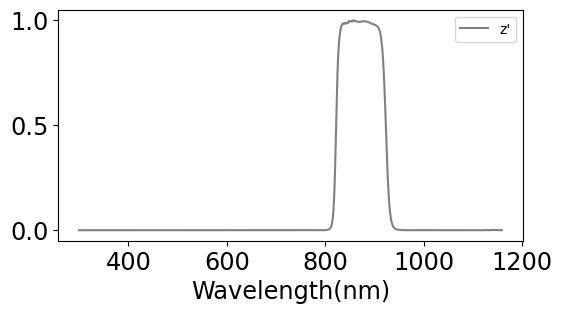

In [60]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_z.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='grey',label="z\'")

In [61]:
df_z.to_csv(filename_filter,sep=' ',index=False)

### Y filter

In [62]:
filename_filter = 'auxtel_sdss_yp.dat'

In [63]:
df_y =df[['BG WL','y\' BG']].rename(columns={'BG WL':'Wavelength(A)','y\' BG':'Throughput(0-1)'})

In [64]:
df_y['Wavelength(nm)'] = df_y['Wavelength(A)']/10.
df_y.drop('Wavelength(A)',axis=1,inplace=True)
df_y = df_y[['Wavelength(nm)','Throughput(0-1)']]

In [65]:
df_y['Throughput(0-1)'][df_y['Throughput(0-1)']<0] = 0

In [66]:
cut_wl = (df_y['Wavelength(nm)']>200.) & (df_y['Wavelength(nm)']<1160)

In [67]:
df_y = df_y[cut_wl]

<Axes: xlabel='Wavelength(nm)'>

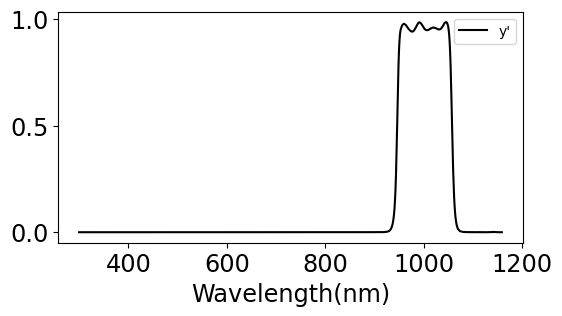

In [68]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
df_y.plot(x='Wavelength(nm)', y='Throughput(0-1)',ax=ax,color='k',label="y\'")

In [69]:
df_y.to_csv(filename_filter,sep=' ',index=False)